## IMPORT LIBRARIES

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## READING AND CONCATENATING DATASETS

In [99]:
path = 'C:/Users/AmaliTech Ghana/Jupyter Projects/dataset' 
os.chdir(path)
datasets = os.listdir(path)

df = [pd.read_csv(file_name) for file_name in datasets]

In [100]:
df = pd.concat(df, ignore_index=True)

In [101]:
df.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
1,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
2,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
3,1444079341,0.996874,0.003541,0.000626,0.006059,0.995050,0.996907,0.998690,1.865318,6.684605,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
4,1444079431,0.997371,0.037653,0.043389,0.102332,0.995548,0.996860,0.998205,0.460806,6.683904,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2


## DATA PREPROCESSING

In [102]:
df.shape

(377346, 278)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377346 entries, 0 to 377345
Columns: 278 entries, timestamp to label_source
dtypes: float64(276), int64(2)
memory usage: 800.3 MB


In [104]:
# Checking for duplicate records
df.duplicated().sum()

0

In [105]:
# Droppping columns with more than 50% missing values
df = df.loc[:,(df.isnull().sum() < (df.shape[0]/2))]
df.shape

(377346, 232)

In [106]:
# Dropping rows with null values for selected columns
df = df.dropna(how="all",subset=["label:SITTING","label:FIX_walking","label:OR_standing","label:LYING_DOWN"])
df.shape

(306594, 232)

In [107]:
df = df.reset_index(drop=True)

In [108]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306594 entries, 0 to 306593
Data columns (total 232 columns):
 #    Column                                                                   Non-Null Count   Dtype  
---   ------                                                                   --------------   -----  
 0    timestamp                                                                306594 non-null  int64  
 1    raw_acc:magnitude_stats:mean                                             306580 non-null  float64
 2    raw_acc:magnitude_stats:std                                              306580 non-null  float64
 3    raw_acc:magnitude_stats:moment3                                          306580 non-null  float64
 4    raw_acc:magnitude_stats:moment4                                          306580 non-null  float64
 5    raw_acc:magnitude_stats:percentile25                                     306580 non-null  float64
 6    raw_acc:magnitude_stats:percentile50              

In [109]:
# Features and Labels seperation
features = df.iloc[:, 1:210]
labels = df.iloc[:, 210:231]

### ANALYSIS OF LABELS

In [110]:
labels.shape

(306594, 21)

In [111]:
labels.isnull().sum().sort_values()

label:SITTING                      0
label:FIX_walking                  0
label:OR_standing                  0
label:LYING_DOWN                2871
label:EATING                   11838
label:LOC_home                 13786
label:SLEEPING                 22992
label:TALKING                  28773
label:AT_SCHOOL                48598
label:OR_exercise              67259
label:COMPUTER_WORK            70761
label:IN_A_MEETING             76109
label:TOILET                   87096
label:COOKING                  98461
label:DRESSING                 99980
label:BATHING_-_SHOWER        106963
label:GROOMING                109075
label:OR_indoors              110609
label:WATCHING_TV             111410
label:SURFING_THE_INTERNET    114592
label:LOC_main_workplace      139708
dtype: int64

In [112]:
# Condensing all labels into these activities:  Sitting, Standing, Walking, and Lying Down
labels = labels.loc[:, ["label:SITTING","label:FIX_walking","label:OR_standing","label:LYING_DOWN"]]

In [113]:
# Number of null values for each column
labels.isna().sum()

label:SITTING           0
label:FIX_walking       0
label:OR_standing       0
label:LYING_DOWN     2871
dtype: int64

In [114]:
# Peeking into the null values
labels[labels["label:LYING_DOWN"].isna()]

,label:SITTING,label:FIX_walking,label:OR_standing,label:LYING_DOWN
11466,1.0,0.0,0.0,NaN
11467,1.0,0.0,0.0,NaN
11468,1.0,0.0,0.0,NaN
11469,1.0,0.0,0.0,NaN
11470,1.0,0.0,0.0,NaN
...,...,...,...,...
163769,1.0,0.0,0.0,NaN
163770,1.0,0.0,0.0,NaN
163771,1.0,0.0,0.0,NaN
163772,1.0,0.0,0.0,NaN


In [115]:
# Replacing the null values in "label:LYING_DOWN" column

labels["label:LYING_DOWN"] = labels.apply(
    lambda row: 1.0 if (((row["label:SITTING"]) + (row["label:FIX_walking"]) + (row["label:OR_standing"])) == 0.0) else 0,
    axis=1)

In [116]:
# Number of null values for each column after replacement
labels.isna().sum()

label:SITTING        0
label:FIX_walking    0
label:OR_standing    0
label:LYING_DOWN     0
dtype: int64

In [117]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306594 entries, 0 to 306593
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   label:SITTING      306594 non-null  float64
 1   label:FIX_walking  306594 non-null  float64
 2   label:OR_standing  306594 non-null  float64
 3   label:LYING_DOWN   306594 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [118]:
# Renaming the label columns
labels = labels.rename(columns={"label:SITTING" : "SITTING", "label:FIX_walking" : "WALKING", "label:OR_standing" : "STANDING", "label:LYING_DOWN" : "LYING_DOWN"})

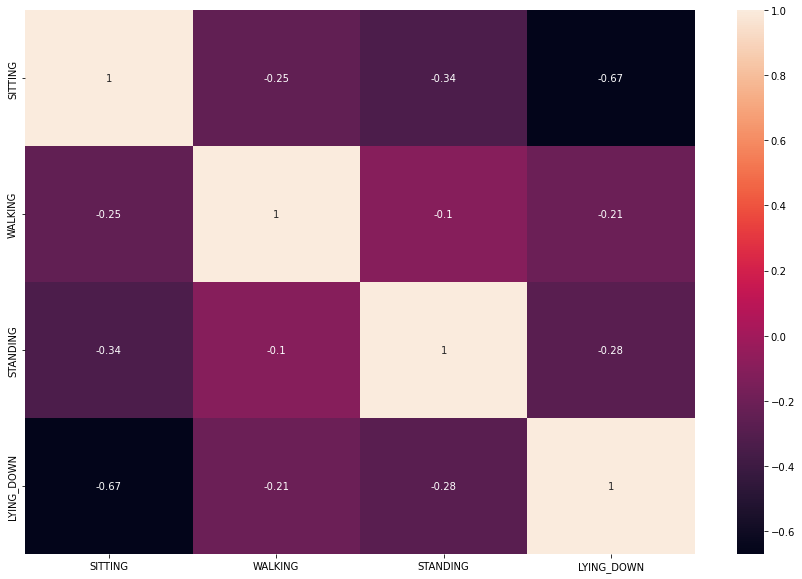

In [119]:
# Checking for correlation between the labels
plt.figure(figsize=(15, 10))
sns.heatmap(labels.corr(), annot=True)
plt.show()

### ANALYSIS OF FEATURES

In [120]:
features.shape

(306594, 209)

In [121]:
features.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306594 entries, 0 to 306593
Data columns (total 209 columns):
 #    Column                                                                   Dtype  
---   ------                                                                   -----  
 0    raw_acc:magnitude_stats:mean                                             float64
 1    raw_acc:magnitude_stats:std                                              float64
 2    raw_acc:magnitude_stats:moment3                                          float64
 3    raw_acc:magnitude_stats:moment4                                          float64
 4    raw_acc:magnitude_stats:percentile25                                     float64
 5    raw_acc:magnitude_stats:percentile50                                     float64
 6    raw_acc:magnitude_stats:percentile75                                     float64
 7    raw_acc:magnitude_stats:value_entropy                                    float64
 8    raw_acc:magn

In [122]:
# Using data recorded by Accelerometer and Gyroscope sensors in detecting human activity
features = features.iloc[:,:52]

In [123]:
features.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306594 entries, 0 to 306593
Columns: 52 entries, raw_acc:magnitude_stats:mean to proc_gyro:3d:ro_yz
dtypes: float64(52)
memory usage: 121.6 MB


#### CORRELATION BETWEEN ACCELEROMETER FEATURES

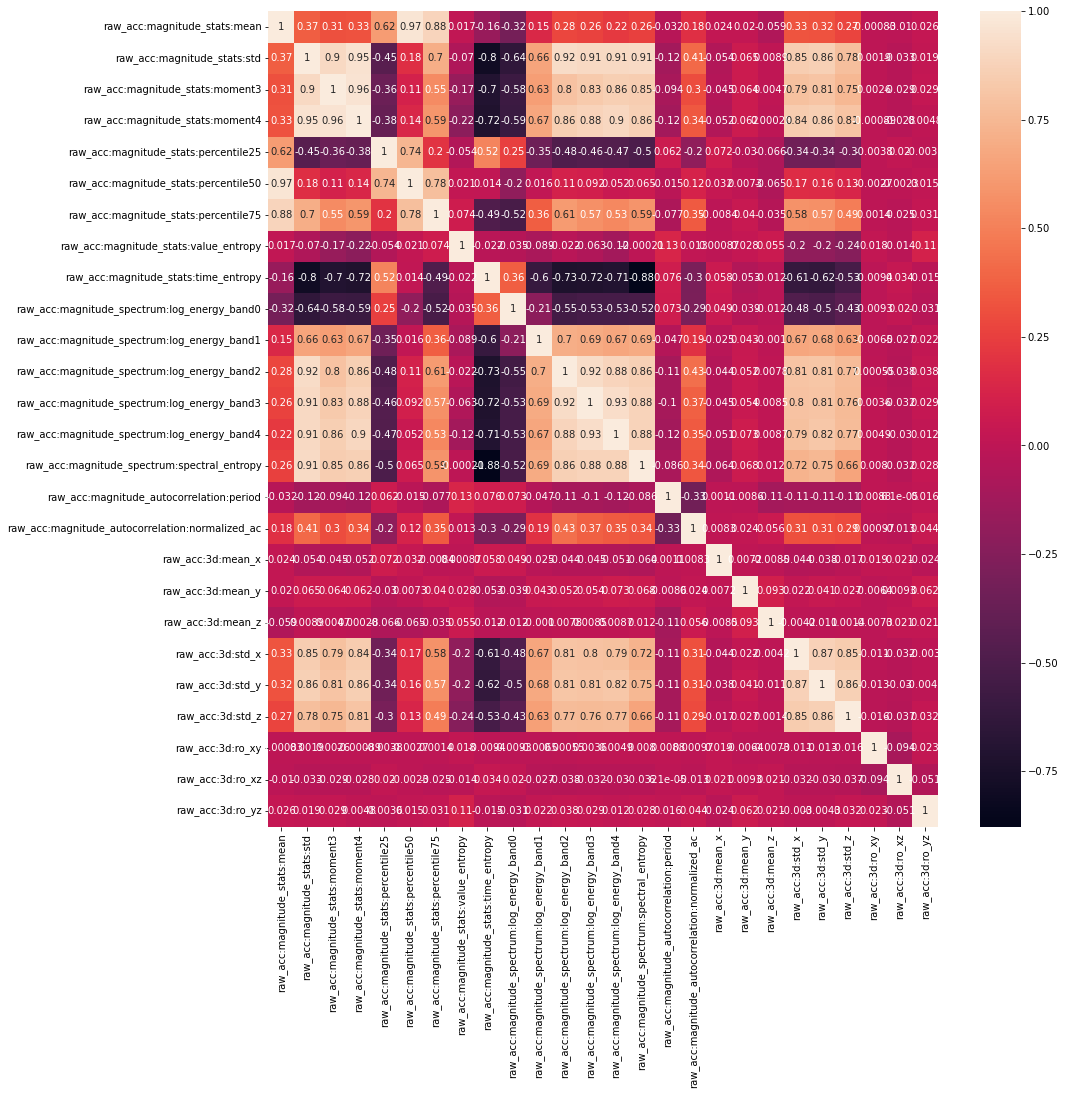

In [124]:
plt.figure(figsize=(15, 15))
sns.heatmap(features.iloc[:, :26].corr(), annot=True)
plt.show()

#### CORRELATION BETWEEN GYROSCOPE FEATURES

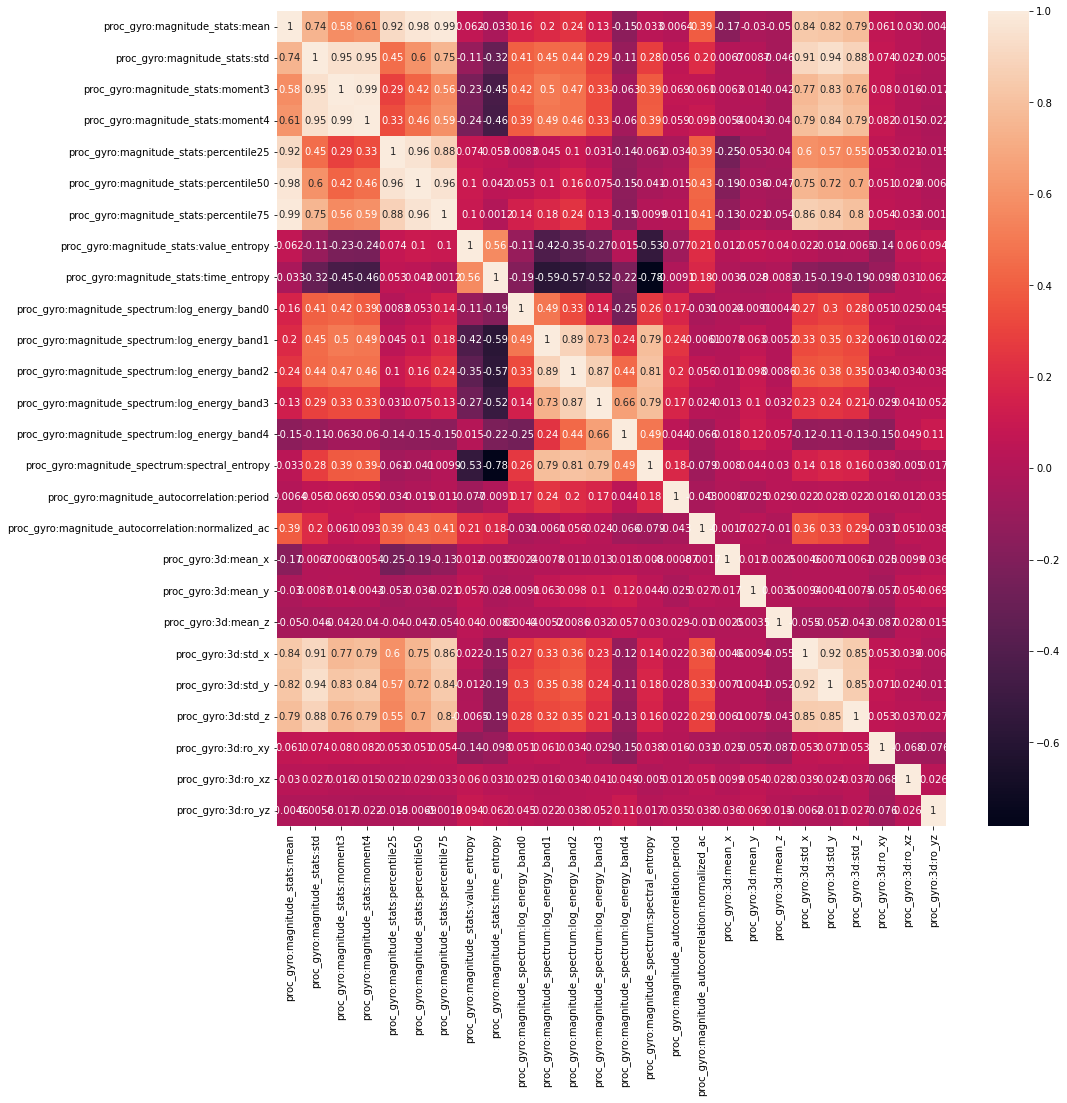

In [125]:
plt.figure(figsize=(15, 15))
sns.heatmap(features.iloc[:, 26:].corr(), annot=True)
plt.show()

In [126]:
# Dropping highly correlated features
features = features.loc[:,["raw_acc:magnitude_stats:mean","raw_acc:magnitude_stats:value_entropy","raw_acc:magnitude_stats:time_entropy","raw_acc:magnitude_spectrum:log_energy_band0","raw_acc:magnitude_autocorrelation:period","raw_acc:magnitude_autocorrelation:normalized_ac","raw_acc:3d:mean_x","raw_acc:3d:mean_y","raw_acc:3d:mean_z","raw_acc:3d:ro_xy","raw_acc:3d:ro_xz","raw_acc:3d:ro_yz","proc_gyro:magnitude_stats:mean","proc_gyro:magnitude_stats:value_entropy","proc_gyro:magnitude_stats:time_entropy","proc_gyro:magnitude_spectrum:log_energy_band0","proc_gyro:magnitude_autocorrelation:period","proc_gyro:magnitude_autocorrelation:normalized_ac","proc_gyro:3d:mean_x","proc_gyro:3d:mean_y","proc_gyro:3d:mean_z","proc_gyro:3d:ro_xy","proc_gyro:3d:ro_xz","proc_gyro:3d:ro_yz"]]

In [127]:
# Filling null values for each column with its median
for column in features.columns:
    features[column] = features[column].fillna(features[column].median())

In [128]:
# Checking for null values after replacement
features.isnull().sum()

raw_acc:magnitude_stats:mean                         0
raw_acc:magnitude_stats:value_entropy                0
raw_acc:magnitude_stats:time_entropy                 0
raw_acc:magnitude_spectrum:log_energy_band0          0
raw_acc:magnitude_autocorrelation:period             0
raw_acc:magnitude_autocorrelation:normalized_ac      0
raw_acc:3d:mean_x                                    0
raw_acc:3d:mean_y                                    0
raw_acc:3d:mean_z                                    0
raw_acc:3d:ro_xy                                     0
raw_acc:3d:ro_xz                                     0
raw_acc:3d:ro_yz                                     0
proc_gyro:magnitude_stats:mean                       0
proc_gyro:magnitude_stats:value_entropy              0
proc_gyro:magnitude_stats:time_entropy               0
proc_gyro:magnitude_spectrum:log_energy_band0        0
proc_gyro:magnitude_autocorrelation:period           0
proc_gyro:magnitude_autocorrelation:normalized_ac    0
proc_gyro:

##  MODEL FOR PREDICTING USER ACTIVITY
### (USING ACCELEROMETER AND GYROSCOPE SENSOR DATA)
#### Activities = [Sitting, Walking, Standing, Lying Down]

### LOADING MACHINE LEARNING PACKAGES

In [129]:
from skmultilearn.problem_transform import LabelPowerset  # pip install scikit-multilearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

### OVERVIEW OF DATASET AFTER PREPROCESSING

#### FEATURES

In [130]:
features.head()

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:ro_xy,...,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz
0,0.996815,1.748756,6.684605,5.043970,0.173685,0.148988,0.002331,0.004614,-0.996790,0.106920,...,6.532865,5.149616,4.193949,0.107787,0.000412,0.000448,-0.000541,-0.372543,0.175125,-0.033004
1,0.996864,1.935573,6.684603,5.043367,0.057819,0.207046,0.003557,0.005495,-0.996832,-0.079483,...,6.550010,4.945471,1.323078,0.140106,0.000091,-0.000082,0.000002,-0.425875,0.138763,0.047049
2,0.996825,2.031780,6.684605,5.043599,0.173440,0.186961,0.004180,0.005776,-0.996785,0.122432,...,6.492197,4.878255,1.323074,0.160500,0.000011,0.000179,0.000026,-0.506993,0.181114,-0.214371
3,0.996874,1.865318,6.684605,5.043263,0.173474,0.479430,0.004179,0.005551,-0.996836,0.308841,...,6.513228,4.917277,0.524236,0.091489,-0.000006,-0.000020,0.000042,-0.565952,0.108946,-0.138670
4,0.997371,0.460806,6.683904,5.042779,0.260603,0.202305,-0.008383,-0.000009,-0.994184,-0.187758,...,4.638178,6.291532,0.000000,0.000000,-0.001074,-0.000934,0.006930,-0.318971,0.097856,-0.353731


In [131]:
features.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306594 entries, 0 to 306593
Columns: 24 entries, raw_acc:magnitude_stats:mean to proc_gyro:3d:ro_yz
dtypes: float64(24)
memory usage: 56.1 MB


#### LABELS

In [132]:
labels.head()

,SITTING,WALKING,STANDING,LYING_DOWN
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [133]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306594 entries, 0 to 306593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SITTING     306594 non-null  float64
 1   WALKING     306594 non-null  float64
 2   STANDING    306594 non-null  float64
 3   LYING_DOWN  306594 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


### DATASET SPLIT

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state=1)

### BUILDING THE MODEL

In [135]:
def build_model(classifier, X_train, Y_train, X_test, Y_test):
    model = LabelPowerset(classifier())
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test) 
    acc = accuracy_score(Y_test, predictions)
    ham = hamming_loss(Y_test, predictions)
    print(f"ACCURACY SCORE: {acc} | HAMMING LOSS: {ham}")
    return (model, predictions)

In [136]:
model_1 = build_model(GaussianNB, X_train, Y_train, X_test, Y_test)

ACCURACY SCORE: 0.5079311581991541 | HAMMING LOSS: 0.24603442090042293


In [137]:
model_2 = build_model(DecisionTreeClassifier, X_train, Y_train, X_test, Y_test)

ACCURACY SCORE: 0.7231759423346633 | HAMMING LOSS: 0.13841202883266832


In [138]:
model_3 = build_model(RandomForestClassifier, X_train, Y_train, X_test, Y_test)

ACCURACY SCORE: 0.7998238728405397 | HAMMING LOSS: 0.10008806357973016


### PREDICTIONS FROM SELECTED MODEL

In [139]:
# Selected model_3 because it recorded the highest accuracy score and lowest hamming loss
Final_Model, Predictions  = model_3   
for prediction in Predictions.toarray():
    print(prediction)

[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]


[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]


[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]


[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]


[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]


[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]


[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]


[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]


[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]


[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]


[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]


[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]


[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]


[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]


[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 1 0]


[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]


[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]


[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]


[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]


[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]


[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 1 0 0]
[1 0 0 0]


[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]


[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]


[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]


[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]


[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]


[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]


[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]


[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]


[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]


[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]


[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]


[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]


[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]


[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]


[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]


[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]


[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]


[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 1 0 0]


[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]


[0 0 1 0]
[1 0 0 0]
[0 1 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]


[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]


[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]


[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]


[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]


[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]


[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]


[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 1 0 0]


[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]


[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[1 0 0 0]


###  MODEL EVALUATION

#### ACCURACY SCORE

In [140]:
print(f"{round(accuracy_score(Y_test, Predictions) * 100)} %")

80 %


#### HAMMING LOSS

In [141]:
print(f"{round(hamming_loss(Y_test, Predictions) * 100)} %")

10 %


#### CONFUSION MATRIX

In [142]:
targets = ['Sitting', 'Walking', 'Standing', 'Lying Down']
confs = multilabel_confusion_matrix(Y_test, Predictions)
for i in zip(targets, confs):
    print(f"Confusion Matrix for '{i[0]}'")
    print(i[1],"\n")

Confusion Matrix for 'Sitting'
[[38344 12715]
 [ 2811 38109]] 

Confusion Matrix for 'Walking'
[[83627  1695]
 [ 3358  3299]] 

Confusion Matrix for 'Standing'
[[78713  1909]
 [ 6826  4531]] 

Confusion Matrix for 'Lying Down'
[[56841  2093]
 [ 5417 27628]] 



#### CLASSIFICATION REPORT

In [143]:
report = classification_report(
    Y_test,
    Predictions,
    output_dict=False,
    target_names=['Sitting', 'Walking', 'Standing', 'Lying Down']
)

print(report)

              precision    recall  f1-score   support

     Sitting       0.75      0.93      0.83     40920
     Walking       0.66      0.50      0.57      6657
    Standing       0.70      0.40      0.51     11357
  Lying Down       0.93      0.84      0.88     33045

   micro avg       0.80      0.80      0.80     91979
   macro avg       0.76      0.67      0.70     91979
weighted avg       0.80      0.80      0.79     91979
 samples avg       0.80      0.80      0.80     91979

